<a href="https://colab.research.google.com/github/vanessavmac/syde572-intro-to-pattern-recognition/blob/main/syde572_assignment3_question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYDE572 Assignment 3 - Question 3

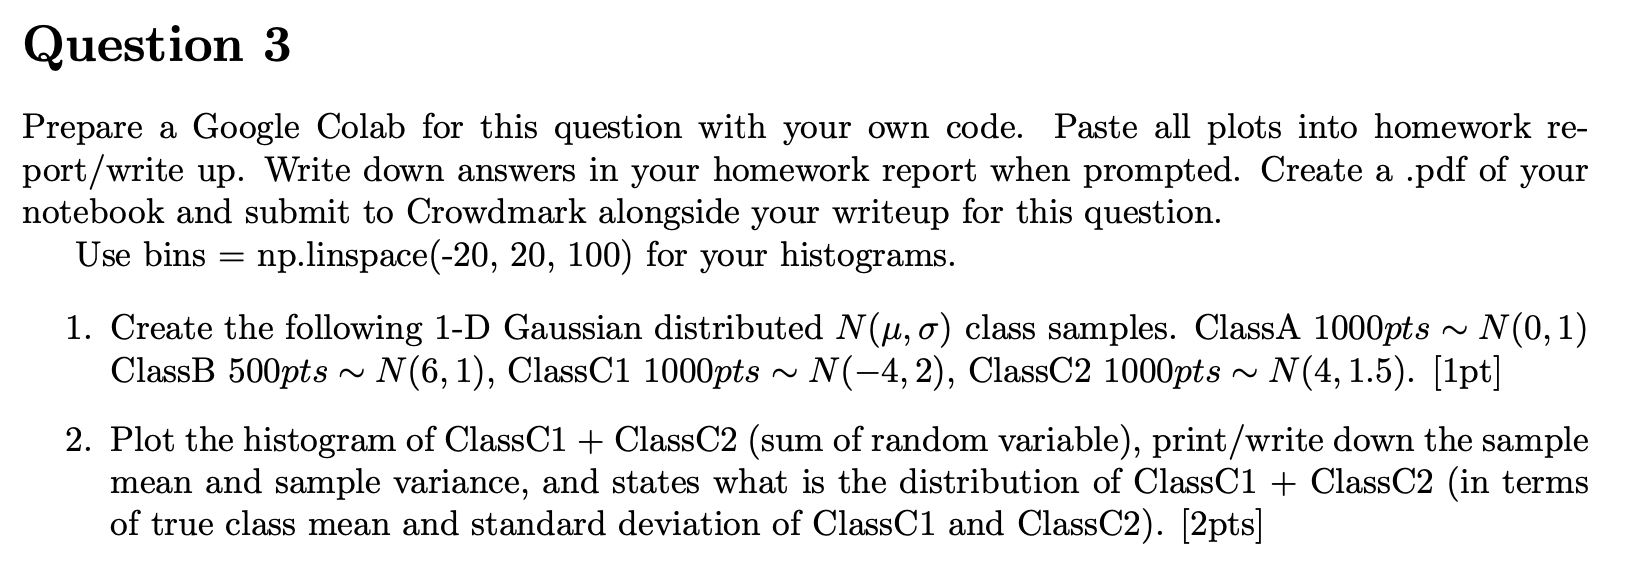

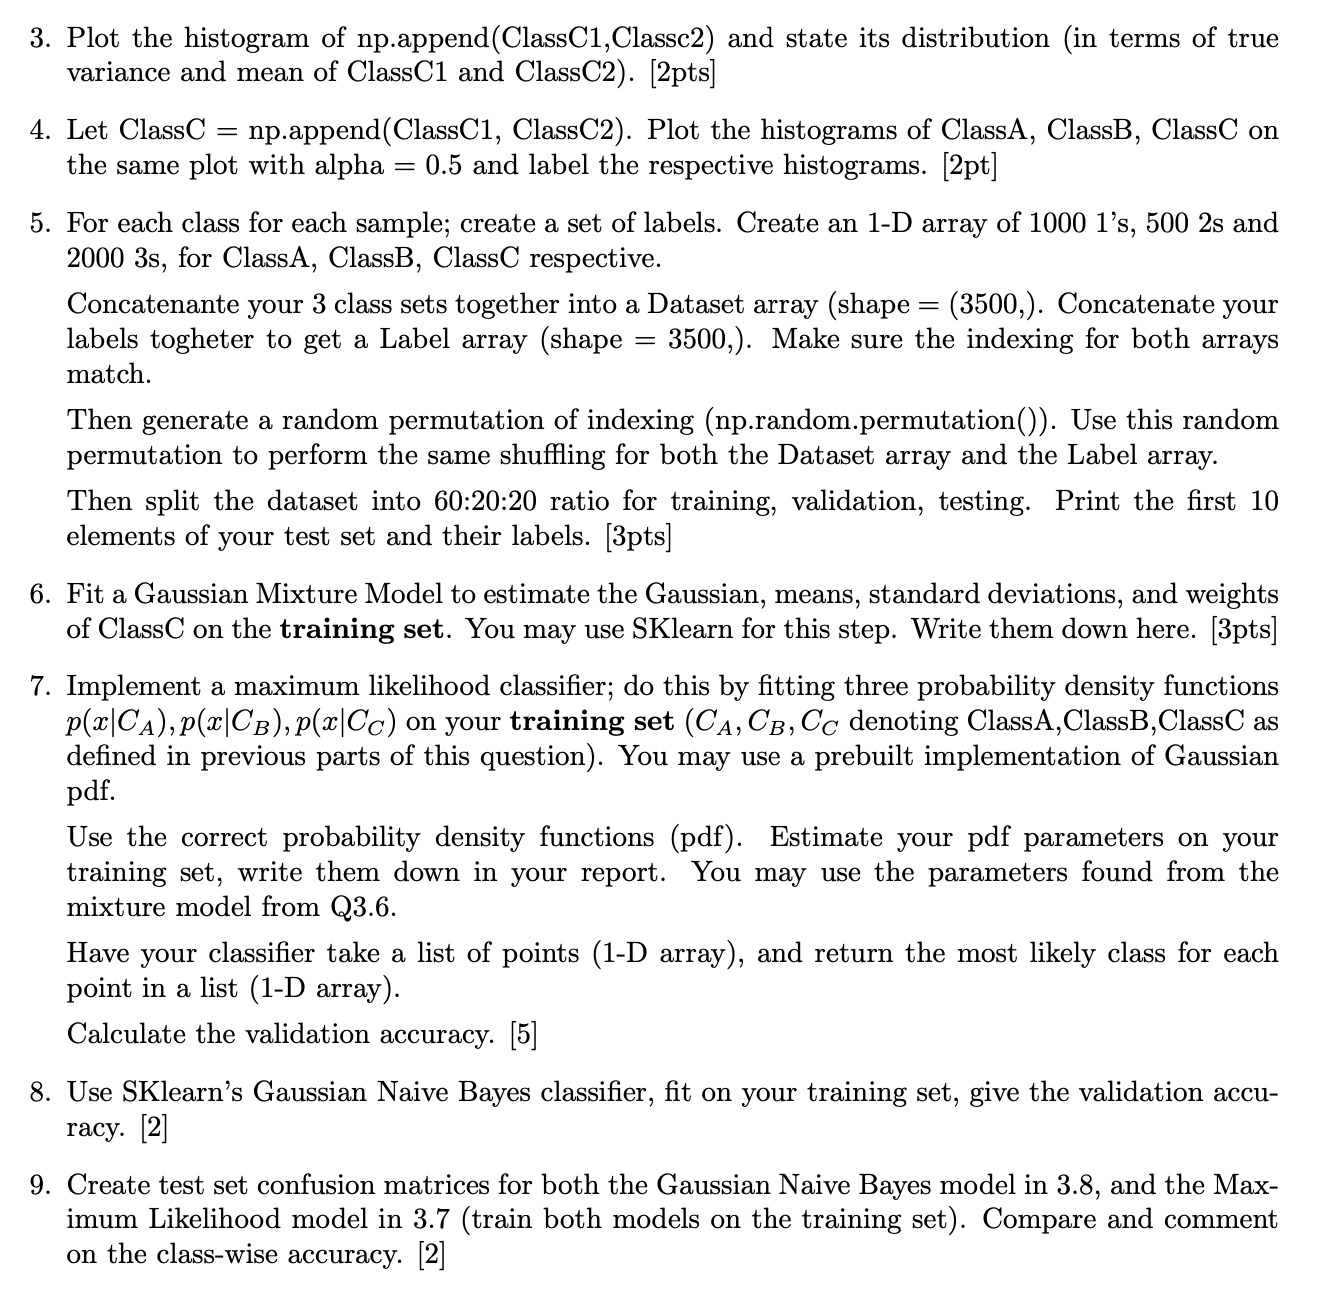

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

np.random.seed(1)

In [ ]:
bins = np.linspace(-20,20,100) # histograms

## Part 1

In [ ]:
classA = np.random.normal(0,1,1000)
classB = np.random.normal(6,1,500)
classC1 = np.random.normal(-4,2,1000)
classC2 = np.random.normal(4,1.5,1000)

## Part 2

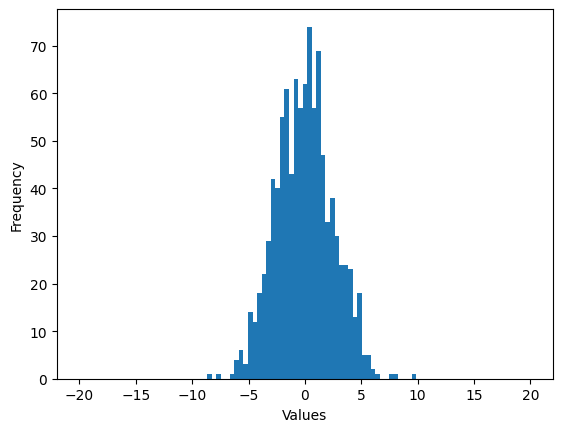

In [ ]:
part2_X = np.add(classC1,classC2)

_, ax = plt.subplots()
plt.hist(part2_X, bins)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sample_mean = np.mean(part2_X)
sample_variance = np.var(part2_X)

print('sample_mean: ', sample_mean)
print('sample_variance: ', sample_variance)

sample_mean:  -0.03274924676443392
sample_variance:  6.226878794634647


Note: notation is $\displaystyle~N(\mu, \sigma)$
<br>
Let C1 be the random variable of ClassC1
<br>
Let C2 be the random variable of ClassC2
<br>
Distribution of Classes: C1+C2 ~ $\displaystyle~N(\mu_{C1}+\mu_{C2}, \sqrt{\sigma_{C1}^2+\sigma_{C2}^2}) = N(-4+4,\sqrt{2^2+1.5^2}) = N(0,2.5)$

## Part 3

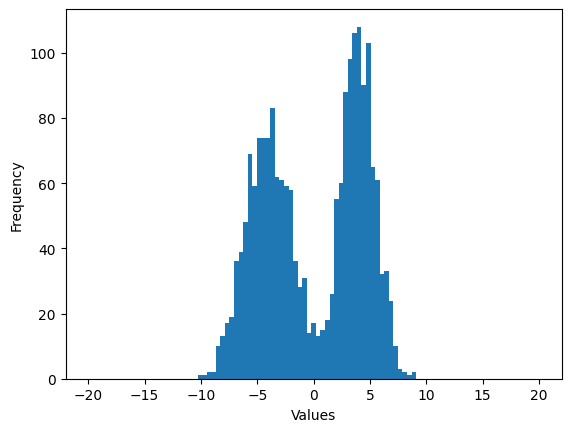

In [ ]:
classC = np.append(classC1,classC2)

_, ax = plt.subplots()
plt.hist(classC, bins)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Note: notation is $\displaystyle~N(\mu, \sigma)$
<br>
Let C1 be the random variable of ClassC1
<br>
Let C2 be the random variable of ClassC2
<br>
Distribution of Classes C1+C2 = $\displaystyle~N(\mu_{C1}, \sigma_{C1})+N(\mu_{C2}, \sigma_{C2}) = N(-4, 2)+N(4, 1.5)$

## Part 4

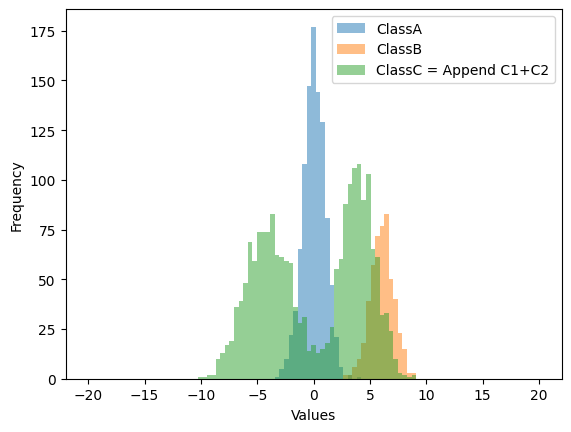

In [ ]:
_, ax = plt.subplots()
plt.hist(classA, bins, label='ClassA', alpha=0.5)
plt.hist(classB, bins, label='ClassB', alpha=0.5)
plt.hist(classC, bins, label='ClassC = Append C1+C2', alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 5

In [ ]:
classA_labels = np.ones((1000,))        # 0 to 999
classB_labels = 2 * np.ones((500,))     # 1000 to 1499
classC_labels = 3 * np.ones((2000,))    # 1500 to 3499

In [ ]:
tmp = np.append(classA, classB)
dataset = np.append(tmp, classC)
assert np.shape(dataset) == (3500,)

In [ ]:
tmp = np.append(classA_labels, classB_labels)
labels = np.append(tmp, classC_labels)
assert np.shape(labels) == (3500,)

In [ ]:
# SANITY CHECK
print(labels[0])
print(labels[999])
print(labels[1000])
print(labels[1499])
print(labels[1500])
print(labels[3499])

1.0
1.0
2.0
2.0
3.0
3.0


In [ ]:
perm = np.random.permutation(3500)
shuffled_dataset = dataset[perm]
shuffled_labels = labels[perm]

In [ ]:
# SANITY CHECK
# print(perm)
# print(shuffled_labels)

In [ ]:
# Split 60:20:20
X_train = shuffled_dataset[:int(3500*0.6)]
X_val = shuffled_dataset[int(3500*0.6):int(3500*0.8)]
X_test = shuffled_dataset[int(3500*0.8):]

y_train = shuffled_labels[:int(3500*0.6)]
y_val = shuffled_labels[int(3500*0.6):int(3500*0.8)]
y_test = shuffled_labels[int(3500*0.8):]

print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_val))
print(np.shape(y_test))

(2100,)
(700,)
(700,)
(2100,)
(700,)
(700,)


In [ ]:
print('First 10 test samples: ')
print(X_test[0:10])
print('First 10 test labels: ')
print(y_test[0:10])

First 10 test samples: 
[ 3.53485783  8.42430662  3.07734098  0.43499832  1.03862836  5.03758129
  3.15409709  3.61853393 -5.60908317 -0.58652394]
First 10 test labels: 
[3. 2. 3. 1. 3. 3. 3. 3. 3. 1.]


## Part 6

In [ ]:
X = np.reshape(X_train, (2100, 1))
X_class_C = X[y_train==3]
gm = GaussianMixture(n_components=2, random_state=1).fit(X_class_C)

print('means: ', gm.means_)
print('std dev: ', np.sqrt(gm.covariances_))
print('weights: ', gm.weights_)

means:  [[ 4.03213338]
 [-4.08018873]]
std dev:  [[[1.56475866]]

 [[1.98589625]]]
weights:  [0.49382104 0.50617896]


## Part 7

In [ ]:
idx = np.argwhere(y_train==1)
X_train_A = np.squeeze(X_train[idx])
idx = np.argwhere(y_train==2)
X_train_B = np.squeeze(X_train[idx])
idx = np.argwhere(y_train==3)
X_train_C = np.squeeze(X_train[idx])

# fit 3 pdfs on the training set
muA, stdA = norm.fit(X_train_A)
muB, stdB = norm.fit(X_train_B)
muC, stdC = norm.fit(X_train_C)

print('Class A PDF parameters: ', muA, ', ', stdA)
print('Class B PDF parameters: ', muB, ', ', stdB)
print('Class C PDF parameters: ', muC, ', ', stdC)

Class A PDF parameters:  0.039304816180300496 ,  0.9814025393478885
Class B PDF parameters:  6.018915547298304 ,  1.0290059466710255
Class C PDF parameters:  -0.07415341073088685 ,  4.433429280688394


In [ ]:
# Calculate validation accuracy
def ml_classifier(data):
  pred = np.array([])

  for i in data:
    pA = norm.pdf(i, muA, stdA)
    pB = norm.pdf(i, muB, stdB)
    pC = norm.pdf(i, muC, stdC)
    c = np.argmax([pA, pB, pC]) + 1
    pred = np.append(pred, [c])

  return(pred)

In [ ]:
pred = ml_classifier(np.copy(X_val))
# print('predictions/most likely class: ', pred)
print('Validation Accuracy = ', accuracy_score(y_val, pred))

Validation Accuracy =  0.7785714285714286


## Part 8

In [ ]:
clf = GaussianNB()
clf.fit(np.reshape(X_train, (-1, 1)), np.reshape(y_train, (-1, 1)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
pred = clf.predict(np.reshape(X_val,(-1,1)))
print('Validation Accuracy = ', accuracy_score(y_val, pred))

Validation Accuracy =  0.8057142857142857


## Part 9

ML Test Accuracy =  0.7757142857142857


<Figure size 4000x4000 with 0 Axes>

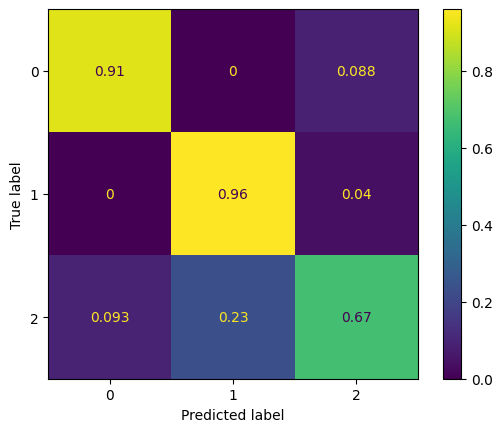

In [ ]:
# ML classifier
pred = ml_classifier(np.copy(X_test))
print('ML Test Accuracy = ', accuracy_score(y_test, pred))

cm = confusion_matrix(y_test, pred, normalize='true')

plt.figure(figsize=(40,40))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

NB Test Accuracy =  0.8128571428571428


<Figure size 4000x4000 with 0 Axes>

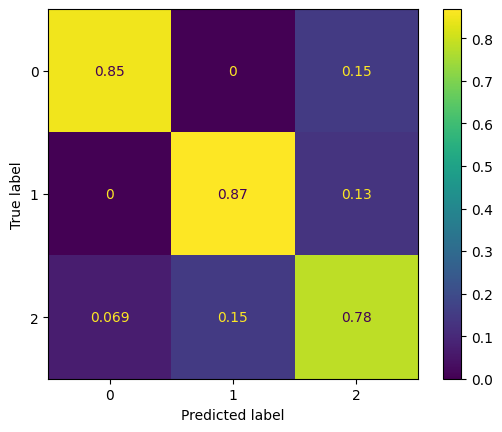

In [ ]:
# NB classifier
pred = clf.predict(np.reshape(X_test,(-1,1)))
print('NB Test Accuracy = ', accuracy_score(y_test, pred))

cm = confusion_matrix(y_test, pred, normalize='true')

plt.figure(figsize=(40,40))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

NB classifier performed better and had slightly higher accuracy overall. However, there is a class imbalance, with significantly fewer Class A and B points (1000 and 500). Therefore, the accuracy could be relatively high just by selecting the more common class (Class C).

<br>

The ML classifier had fewer TP for Class C (the mixture model) with TP probability of 0.67 compared to the other classes with 0.91 and 0.96.

Similarly in the Naive Bayes, Class C has a lower TP probability (0.78). But the other TP probability for classes A and B were lower than the ML classifier (0.85, 0.87).

Therefore, overall Class C had lower accuracies (based on the TP probabilities) which could be explained by how it's a mixture model that was fitted with a single gaussian.
